To use this notebook, we need an Excel file of the form of two columns (minimum):
1. Date
2. Price

Using that data, this book will automatically run analysis and present insights.

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Reading the input data

In [112]:
NAME_OF_FILE = "amis_2007-2022.xlsx"
NAME_OF_SHEET = "isb-prices"
NAME_OF_DATE_COLUMN = "date"
NAME_OF_PRICE_COLUMN = "potato-fresh"

In [113]:
df = pd.read_excel(NAME_OF_FILE, sheet_name=NAME_OF_SHEET)
df = df[[NAME_OF_DATE_COLUMN, NAME_OF_PRICE_COLUMN]]
df.head(5)

,date,potato-fresh
0,2007-05-01,NaN
1,2007-05-02,NaN
2,2007-05-03,NaN
3,2007-05-04,NaN
4,2007-05-05,NaN


In [114]:
df['dayofyear'] = df['date'].apply(lambda x: x.day_of_year)
df['dayofweek'] = df['date'].apply(lambda x: x.day_of_week)
df['weekday_name'] = df['date'].apply(lambda x: x.day_name())
df['month_name'] = df['date'].apply(lambda x: x.month_name())
df['dayofmonth'] = df['date'].apply(lambda x: x.day)
df['month'] = df['date'].apply(lambda x: x.month)
df.head(7)

,date,potato-fresh,dayofyear,dayofweek,weekday_name,month_name,dayofmonth,month
0,2007-05-01,NaN,121,1,Tuesday,May,1,5
1,2007-05-02,NaN,122,2,Wednesday,May,2,5
2,2007-05-03,NaN,123,3,Thursday,May,3,5
3,2007-05-04,NaN,124,4,Friday,May,4,5
4,2007-05-05,NaN,125,5,Saturday,May,5,5
5,2007-05-06,NaN,126,6,Sunday,May,6,5
6,2007-05-07,NaN,127,0,Monday,May,7,5


In [115]:
weekday_number = df[[NAME_OF_PRICE_COLUMN, 'weekday_name', 'dayofweek']].groupby(by='weekday_name').count().reset_index().sort_values('dayofweek')
weekday_number

,weekday_name,potato-fresh,dayofweek
1,Monday,735,817
3,Sunday,51,817
0,Friday,724,818
2,Saturday,699,818
4,Thursday,746,818
5,Tuesday,734,818
6,Wednesday,747,818


In [116]:
week_trend = df[[NAME_OF_PRICE_COLUMN, 'weekday_name', 'dayofweek']].groupby(by='weekday_name').mean().reset_index().sort_values('dayofweek')
week_trend

,weekday_name,potato-fresh,dayofweek
1,Monday,27.358517,0.0
5,Tuesday,26.782752,1.0
6,Wednesday,26.790870,2.0
4,Thursday,26.548324,3.0
0,Friday,27.167555,4.0
2,Saturday,27.010029,5.0
3,Sunday,32.911765,6.0


Text(0, 0.5, 'Avg. Price')

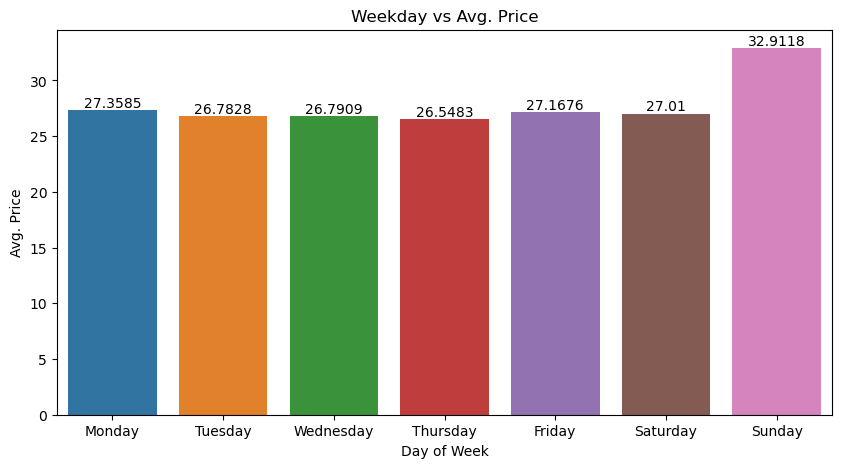

In [117]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=week_trend, x='weekday_name', y=NAME_OF_PRICE_COLUMN)
ax.bar_label(ax.containers[0])
plt.title("Weekday vs Avg. Price")
plt.xlabel('Day of Week')
plt.ylabel('Avg. Price')

In [118]:
monthday_count = df[[NAME_OF_PRICE_COLUMN, 'dayofmonth']].groupby(by='dayofmonth').count().reset_index().sort_values('dayofmonth')
monthday_count.head()

,dayofmonth,potato-fresh
0,1,135
1,2,146
2,3,145
3,4,148
4,5,141


Text(0, 0.5, 'Data Points')

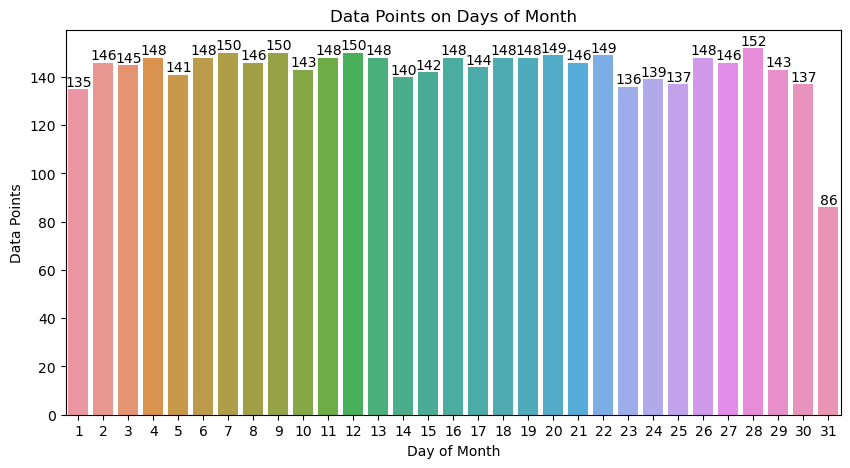

In [119]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=monthday_count, x='dayofmonth', y=NAME_OF_PRICE_COLUMN)
ax.bar_label(ax.containers[0])
plt.title("Data Points on Days of Month")
plt.xlabel('Day of Month')
plt.ylabel('Data Points')


In [120]:
monthday_mean = df[[NAME_OF_PRICE_COLUMN, 'dayofmonth']].groupby(by='dayofmonth').mean().reset_index().sort_values('dayofmonth')
monthday_mean.describe()

,dayofmonth,potato-fresh
count,31.000000,31.000000
mean,16.000000,26.989107
std,9.092121,0.650604
min,1.000000,25.049070
25%,8.500000,26.594333
50%,16.000000,27.057203
75%,23.500000,27.272602
max,31.000000,28.930284


Text(0, 0.5, 'Avg. Price')

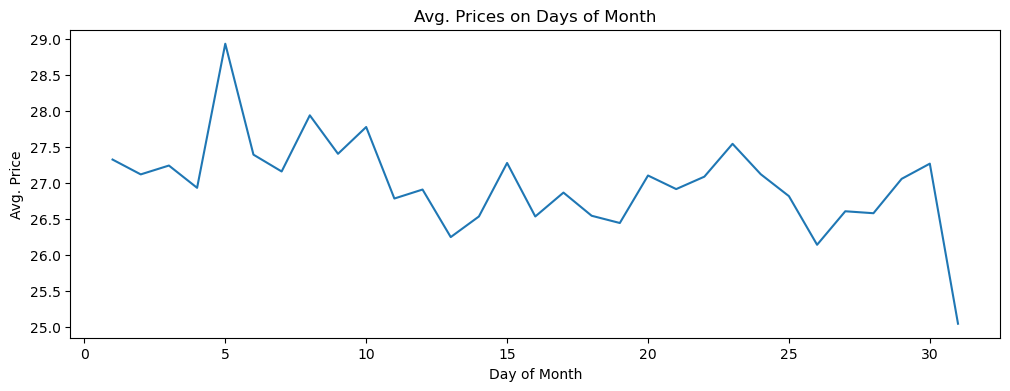

In [121]:
plt.figure(figsize=(12,4))

chart3 = sns.lineplot(data=monthday_mean, x="dayofmonth", y=NAME_OF_PRICE_COLUMN)
plt.title("Avg. Prices on Days of Month")
plt.xlabel('Day of Month')
plt.ylabel('Avg. Price')


In [122]:
yearwise_daily = df[[NAME_OF_PRICE_COLUMN, 'dayofyear']].groupby(by='dayofyear').mean().reset_index().sort_values('dayofyear')
yearwise_monthly = df[[NAME_OF_PRICE_COLUMN, 'month_name', 'dayofyear']].groupby(by='month_name').mean().sort_values('dayofyear').reset_index()
yearwise_monthly.head()

,month_name,potato-fresh,dayofyear
0,January,19.134412,16.000000
1,February,16.916727,45.636792
2,March,18.363468,75.266667
3,April,20.664373,105.766667
4,May,22.332838,136.250000


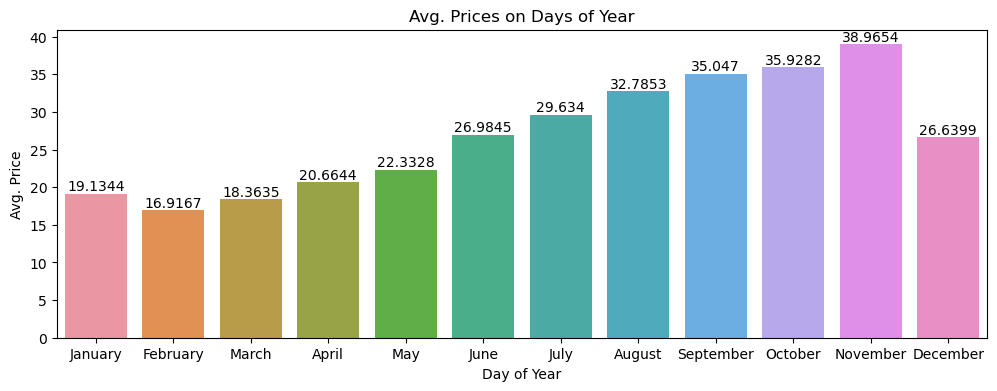

In [123]:
plt.figure(figsize=(12,4))

chart5 = sns.barplot(data=yearwise_monthly, x="month_name", y=NAME_OF_PRICE_COLUMN)
chart5.bar_label(chart5.containers[0])
plt.title("Avg. Prices on Days of Year")
plt.xlabel('Day of Year')
plt.ylabel('Avg. Price')
plt.show()


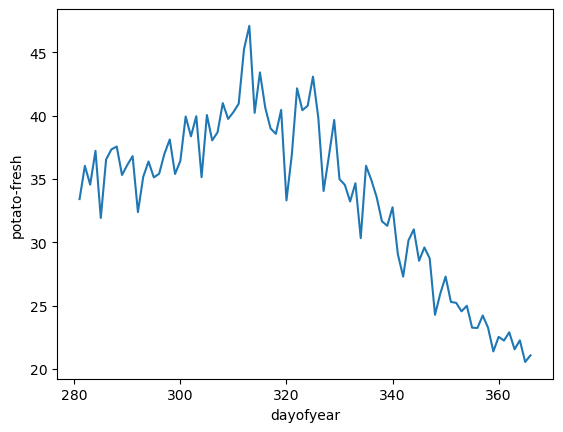

In [124]:
chart4 = sns.lineplot(data=yearwise_daily[yearwise_daily['dayofyear']>280], x="dayofyear", y=NAME_OF_PRICE_COLUMN)
plt.show()
